# Case Study - Spam Detection
* The main aim of this project is to demonstrate the basics of Natural Language Processing (NLP).

* Major Steps Involved:

* 1)Text Data Visualisation
* 2)Text Data Preprocessing
* 3)Text Data To Numerical Vector Conversion using Bag of Words
* --> We will follow the steps mentioned below:

* --> Data Loading
* --> Exploratory Data Analysis
* --> Data Preparation
* --> Train Test Split
* -->Data Preprocessing (special characters, stop words, lower case, stemming, etc)
* 4)Converting text to numerical vector using Bag of Words
* 5)Preprocessing Test Data
* 6)Training on Train Data
* 7)Predictions on Test Data
* 8)Model Evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv(r"C:\Users\Maruthipadala\Downloads\archive (13)\spam.csv",encoding="ISO-8859-1")

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.columns=['labels','emails']
df

,labels,emails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.isna().sum()

labels    0
emails    0
dtype: int64

In [8]:
df.duplicated().sum()

403

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df['labels'].value_counts()

ham     4516
spam     653
Name: labels, dtype: int64

In [12]:
df['labels'].value_counts(normalize=True)

ham     0.87367
spam    0.12633
Name: labels, dtype: float64

<AxesSubplot:xlabel='labels', ylabel='count'>

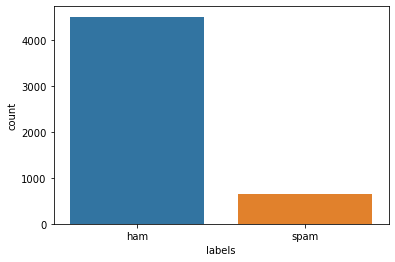

In [13]:
sns.countplot(x='labels',data=df)

## Data Preparation - Split the data into train and test set


In [14]:
x=df[['emails']]
y=df[['labels']]

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
x_train.head()

,emails
3794,Also remember the beads don't come off. Ever.
4290,Call me when u're done...
2603,\Im at arestaurant eating squid! i will be out...
3452,Nowadays people are notixiquating the laxinorf...
3132,So no messages. Had food?


## Data Prepration - Text Preprocessing

In [17]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet') ## Applied before using lemmatizer (to preserve human reseability)
nltk.download('omw-1.4')
import re
from nltk.tokenize import word_tokenize ## Used to tokenize/split words 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maruthipadala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Maruthipadala\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Maruthipadala\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [18]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

## initialise the inbuilt Lemmatizer
lemmatizer = WordNetLemmatizer()

In [19]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [20]:
from tqdm import tqdm, tqdm_notebook


In [21]:
tqdm.pandas()


In [22]:
# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`

temp_df = x_train['emails'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|█████████████████████████████████████████████████████████████████████████████| 4135/4135 [00:14<00:00, 278.56it/s]


,0,1
3794,also remember bead come ever,5
4290,call u done,3
2603,im arestaurant eating squid wanna dosomething ...,7
3452,nowadays people notixiquating laxinorficated o...,22
3132,message food,2


In [23]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

,clean_text_lemma,text_length_lemma
3794,also remember bead come ever,5
4290,call u done,3
2603,im arestaurant eating squid wanna dosomething ...,7
3452,nowadays people notixiquating laxinorficated o...,22
3132,message food,2


In [24]:
x_train = pd.concat([x_train , temp_df], axis=1)

x_train.head()

,emails,clean_text_lemma,text_length_lemma
3794,Also remember the beads don't come off. Ever.,also remember bead come ever,5
4290,Call me when u're done...,call u done,3
2603,\Im at arestaurant eating squid! i will be out...,im arestaurant eating squid wanna dosomething ...,7
3452,Nowadays people are notixiquating the laxinorf...,nowadays people notixiquating laxinorficated o...,22
3132,So no messages. Had food?,message food,2



### Converting Text to Numerical vectors - BOW Representation
* Step 1 - Learn the vocabulary from the train data
* Step 2 - Transform the train['emails'] to X_train (i.e. DTM)
* Step 3 - Transform the test['emails'] to X_test (i.e. DTM)



In [25]:
x_train.head()

,emails,clean_text_lemma,text_length_lemma
3794,Also remember the beads don't come off. Ever.,also remember bead come ever,5
4290,Call me when u're done...,call u done,3
2603,\Im at arestaurant eating squid! i will be out...,im arestaurant eating squid wanna dosomething ...,7
3452,Nowadays people are notixiquating the laxinorf...,nowadays people notixiquating laxinorficated o...,22
3132,So no messages. Had food?,message food,2


In [26]:
y_train


,labels
3794,ham
4290,ham
2603,ham
3452,ham
3132,ham
...,...
5307,ham
3455,ham
1708,ham
2730,ham


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()

x_train_bow = vocab.fit_transform(x_train['clean_text_lemma'])

In [28]:
x_train_bow


<4135x6146 sparse matrix of type '<class 'numpy.int64'>'
	with 32579 stored elements in Compressed Sparse Row format>

In [29]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(x_train_bow))

print("Shape of input data:", x_train_bow.shape)

Total unique words: 6146
Type of train features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data: (4135, 6146)


## Test Processing

In [30]:
x_test.head()

,emails
1851,Dunno da next show aft 6 is 850. Toa payoh got...
2375,Thanx 4 2day! U r a goodmate I THINK UR RITE S...
2743,But my family not responding for anything. Now...
3324,Nope... Juz off from work...
3995,We'll you pay over like &lt;#&gt; yrs so its ...


In [31]:
temp_df = x_test['emails'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|█████████████████████████████████████████████████████████████████████████████| 1034/1034 [00:03<00:00, 292.15it/s]


,0,1
1851,dunno da next show aft toa payoh got,8
2375,thanx day u r goodmate think ur rite sary asus...,15
2743,family responding anything room went home diwa...,14
3324,nope juz work,3
3995,pay like lt gt yr difficult,6


In [32]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()


,clean_text_lemma,text_length_lemma
1851,dunno da next show aft toa payoh got,8
2375,thanx day u r goodmate think ur rite sary asus...,15
2743,family responding anything room went home diwa...,14
3324,nope juz work,3
3995,pay like lt gt yr difficult,6


In [33]:
x_test_bow = vocab.transform(temp_df['clean_text_lemma'])


## LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train_bow, y_train)

LogisticRegression()

In [35]:
y_pred = classifier.predict(x_test_bow)
from sklearn.metrics import accuracy_score, classification_report,f1_score

print('f1_score:',f1_score(y_test, y_pred, pos_label='ham'))

print(classification_report(y_test, y_pred))


f1_score: 0.9865771812080537
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       885
        spam       0.98      0.86      0.91       149

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



## DecisionTreeClassifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train_bow, y_train)
y_test_pred = classifier.predict(x_test_bow)
print('f1_score:',f1_score(y_test, y_test_pred,pos_label='ham'))

print(classification_report(y_test, y_test_pred))

f1_score: 0.9836619718309858
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       885
        spam       0.92      0.89      0.90       149

    accuracy                           0.97      1034
   macro avg       0.95      0.94      0.94      1034
weighted avg       0.97      0.97      0.97      1034



## RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train_bow, y_train)
y_test_pred = classifier.predict(x_test_bow)
print('f1_score:',f1_score(y_test, y_test_pred,pos_label='ham'))

print(classification_report(y_test, y_test_pred))

f1_score: 0.9849582172701951
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       885
        spam       0.99      0.83      0.90       149

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034

